In [12]:
import hashlib
import time

In [13]:
class Block:
    def __init__(self, index, previous_hash, transactions, nonce=0):
        self.index = index
        self.timestamp = time.time()
        self.transactions = transactions
        self.previous_hash = previous_hash
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        data = f"{self.index}{self.timestamp}{self.transactions}{self.previous_hash}{self.nonce}"
        return hashlib.sha256(data.encode()).hexdigest()

    def mine_block(self, difficulty):
        """Basic Proof-of-Work: Find a hash that starts with '0' * difficulty"""
        while self.hash[:difficulty] != "0" * difficulty:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"Block {self.index} mined: {self.hash}")

In [14]:
class Blockchain:
    def __init__(self, difficulty=2):
        self.chain = [self.create_genesis_block()]
        self.difficulty = difficulty

    def create_genesis_block(self):
        return Block(0, "0", "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, transactions):
        previous_block = self.get_latest_block()
        new_block = Block(len(self.chain), previous_block.hash, transactions)
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i - 1]

            if current_block.hash != current_block.calculate_hash():
                print(f"Block {current_block.index} has been tampered!")
                return False
            if current_block.previous_hash != previous_block.hash:
                print(f"Block {current_block.index} has an incorrect previous hash!")
                return False
        return True

    def tamper_with_block(self, index, new_transactions):
        if 0 < index < len(self.chain):
            self.chain[index].transactions = new_transactions
            self.chain[index].hash = self.chain[index].calculate_hash()

    def print_chain(self):
        for block in self.chain:
            print(block)


In [15]:
# Create Blockchain
blockchain = Blockchain(difficulty=3)

# Add Blocks
blockchain.add_block("Transaction 1")
blockchain.add_block("Transaction 2")

# Print Blockchain
blockchain.print_chain()

# Check if Blockchain is Valid
print("Is blockchain valid?", blockchain.is_chain_valid())

Block 1 mined: 000e1b9d31e537dfeeef5ebab75cc1e22dcfe196da8a72f914ee27cec3bffe79
Block 2 mined: 0009cffcff46963d3a03507f64c9a98a11e64de2435c8240a352c55cb8f50765
Is blockchain valid? True


In [16]:
# Tamper with Blockchain
blockchain.tamper_with_block(1, "Tampered Transaction")

print("\nAfter tampering:")
blockchain.print_chain()

# Check Blockchain Integrity Again
print("Is blockchain valid?", blockchain.is_chain_valid())



After tampering:
Block 2 has an incorrect previous hash!
Is blockchain valid? False


# Matplotlib Blockchain Visualization

In [18]:
!pip install networkx matplotlib


Block 1 mined: 0087bdafa906b7410b301c9a317d27d5b13af9aeaee1948b02b02010ddb138d8
Block 2 mined: 00c8a9cba4be1d9372590202f811f8df9a20fd5f300d406caebdef5bdb6248ec


C:\Users\Madhuri\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


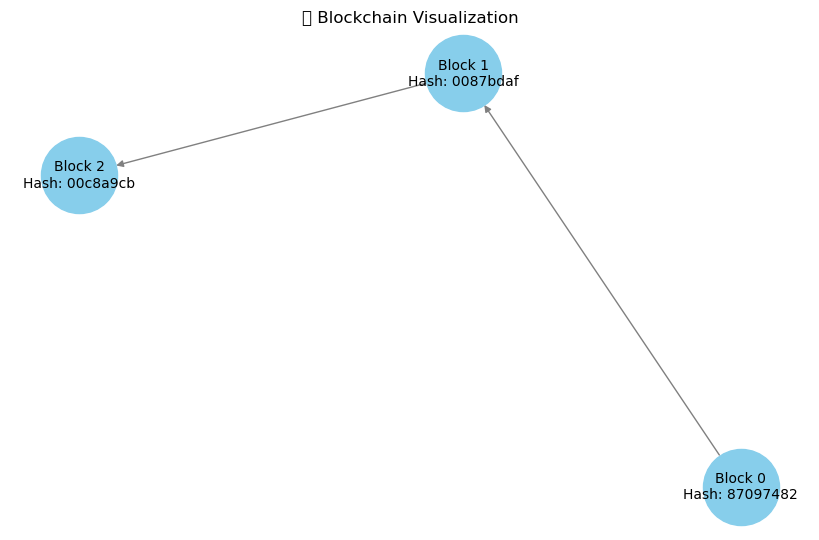

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_blockchain(blockchain):
    """Visualizes the blockchain as a connected graph."""
    G = nx.DiGraph()
    
    for block in blockchain.chain:
        G.add_node(block.index, label=f"Block {block.index}\nHash: {block.hash[:8]}")

    for i in range(1, len(blockchain.chain)):
        G.add_edge(blockchain.chain[i - 1].index, blockchain.chain[i].index)
    
    plt.figure(figsize=(8, 5))
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_color="skyblue", edge_color="gray", node_size=3000, font_size=10)
    plt.title("🔗 Blockchain Visualization")
    plt.show()

# Run the blockchain and visualize
blockchain = Blockchain(difficulty=2)
blockchain.add_block("User A -> User B: $100")
blockchain.add_block("User C -> User D: $50")

visualize_blockchain(blockchain)


## Interactive CLI Simulation (Basic)
     Add User Input to Control the Blockchain

In [ ]:
import hashlib
import time

class Block:
    def __init__(self, index, previous_hash, transactions, nonce=0):
        self.index = index
        self.timestamp = time.time()
        self.transactions = transactions
        self.previous_hash = previous_hash
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        data = f"{self.index}{self.timestamp}{self.transactions}{self.previous_hash}{self.nonce}"
        return hashlib.sha256(data.encode()).hexdigest()

    def mine_block(self, difficulty):
        """Proof-of-Work: Hash must start with '0' * difficulty"""
        while self.hash[:difficulty] != "0" * difficulty:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print(f"✅ Block {self.index} mined: {self.hash}")

class Blockchain:
    def __init__(self, difficulty=2):
        self.chain = [self.create_genesis_block()]
        self.difficulty = difficulty

    def create_genesis_block(self):
        return Block(0, "0", "Genesis Block")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, transactions):
        """Creates, mines, and adds a new block"""
        previous_block = self.get_latest_block()
        new_block = Block(len(self.chain), previous_block.hash, transactions)
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)
        print(f"✅ Block {new_block.index} added!")

    def print_chain(self):
        """Prints the blockchain with links"""
        for block in self.chain:
            print(f"🟦 Block {block.index} - Hash: {block.hash[:10]}... - Transactions: {block.transactions}")

    def is_chain_valid(self):
        """Validates blockchain integrity"""
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i - 1]

            if current.hash != current.calculate_hash():
                print(f"❌ Block {current.index} has been tampered!")
                return False
            if current.previous_hash != previous.hash:
                print(f"❌ Block {current.index} has an incorrect previous hash!")
                return False
        return True

    def tamper_with_block(self, index, new_transactions):
        """Tamper a block to show blockchain security"""
        if 0 < index < len(self.chain):
            self.chain[index].transactions = new_transactions
            self.chain[index].hash = self.chain[index].calculate_hash()
            print(f"⚠️ Block {index} tampered!")

# Run the interactive simulation
blockchain = Blockchain(difficulty=3)

while True:
    print("\n📌 Blockchain Menu:")
    print("1️⃣ Add Block")
    print("2️⃣ Print Blockchain")
    print("3️⃣ Validate Blockchain")
    print("4️⃣ Tamper with Blockchain")
    print("5️⃣ Exit")
    
    choice = input("Choose an option: ")
    
    if choice == "1":
        txn = input("Enter transaction details: ")
        blockchain.add_block(txn)
    elif choice == "2":
        blockchain.print_chain()
    elif choice == "3":
        print("✅ Blockchain Valid!" if blockchain.is_chain_valid() else "❌ Blockchain is Corrupt!")
    elif choice == "4":
        blk = int(input("Enter block index to tamper: "))
        new_txn = input("Enter fake transaction: ")
        blockchain.tamper_with_block(blk, new_txn)
    elif choice == "5":
        print("🔻 Exiting simulation.")
        break
    else:
        print("❌ Invalid choice! Try again.")
